<a href="https://colab.research.google.com/github/DavidS324/Sexton_David_Math24/blob/main/Sexton_David_Math_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Standard function import

# Normal Random Number Generator

In [ ]:
#CDF PDF

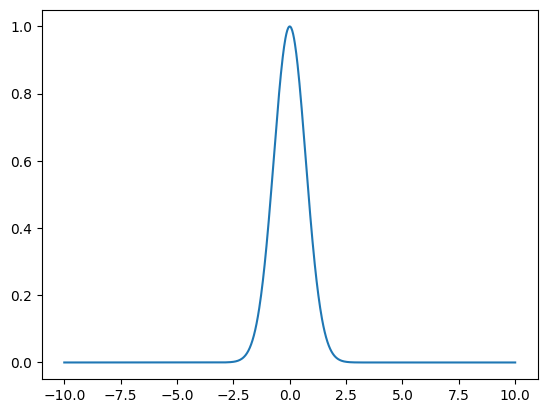

In [ ]:
x = np.linspace(-10,10,1000)
y = 2.71**(-x**2)
plt.plot(x,y)
#Generates values for x and defines y in terms of x and plots x vs y

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [ ]:
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))
  # Defines the equations shown above as the normal_pdf function

In [ ]:
x = np.linspace(-6,6,1000) # Creates 1000 values from -6-6 for x

In [ ]:
mu = 0 # Sets the value for the mu variable

In [ ]:
sigma = 1 # Sets the value for the sigma variable

In [ ]:
pdf = normal_pdf(x,mu,sigma) # Inputs x, mu, and sigma and uses them in the normal_pdf function

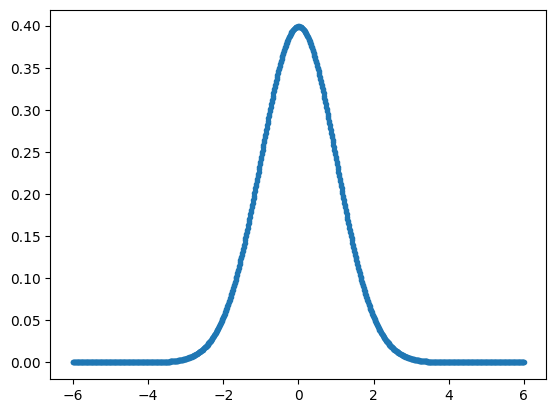

In [ ]:
plt.plot(x,pdf,'.')
# plt.plot(x,y,'g.')

In [ ]:
def cumulative_sum(x):

  y = np.zeros(x.shape)

  for n in range(x.shape[0]):

    y[n] = np.sum(x[0:n])

  y = y / np.max(y)

  return y
  # Defines the cumulative_sum function to add all points in x

In [ ]:
cdf = cumulative_sum(pdf) # Uses the cumulative sum function to create the cdf from the probability density function

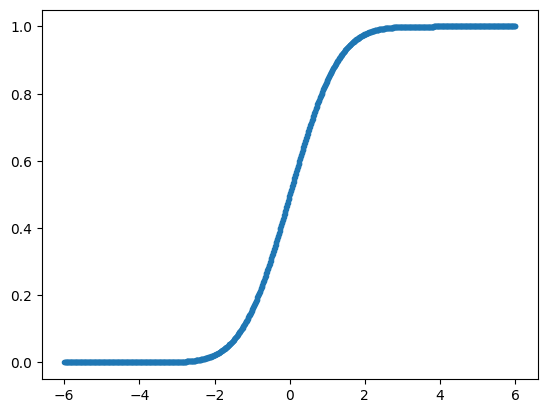

In [ ]:
plt.plot(x,cdf,'.'); # plots x vs the cumulative

In [ ]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

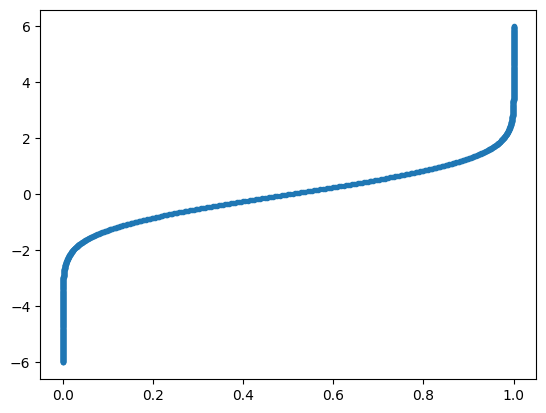

In [ ]:
plt.plot(cdf,x,'.');# plots the cumulative vs x

In [ ]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx
  # defines the find_nearest function to find the closest value of the array to a selected number

In [ ]:
find_nearest(cdf, 0.1) # uses the find_nearest function to find the value of the array closest to 0.1

393

In [ ]:
x[393] # Prints the value in x of the same element

-1.2792792792792795

In [ ]:
xr = np.random.random((10000,)) # generates 10000 random numbers

In [ ]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]
  # Creates an array of zeroes for w and attempts to find the nearest values in x to place in the w array

In [ ]:
w.shape # returns the number of elements in or shape of the array

(10000,)

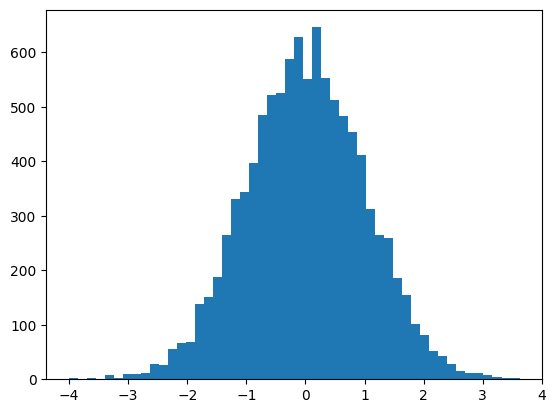

In [ ]:
plt.hist(w,50); # Plots a histogram of the w array with 50 bins

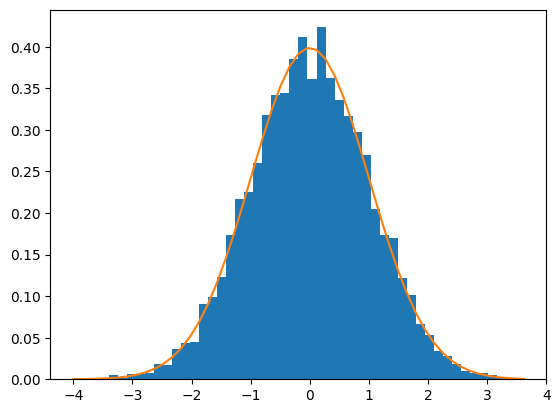

In [ ]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)
# Replots the histogram of the w array and adds a standard curve

# Homework

# Birthday Paradox

In [ ]:
import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 75

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability
# Meant to determine the chance of two+ people in a room having the same birthday, it reaches 100% chance between 75-80 people


0.9994

# Monty Hall

In [ ]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching
# Simulates the monty hall paradox based on a game show about picking one out of three doors and how people inexplicably have a higher chance of winning when they change their choice after a door is revealed
# despite the fact that the reveal of one of the other doors shouldn't influence the outcome of either of the remaining doors

(0.3301, 0.6699)

# Simple Craps

In [ ]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning
# simulates a dice game and the chances of winning

0.5039

# Collector's Card Paradox


In [ ]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs
# Simulates opening card packs and attempts to calculate the number of packs needed in order to collect all unique characters available in the packs


29.2045

In [ ]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 100

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws
# Calculates the number of attempts it is likely to take to complete a pair of socks when pulling random socks from a pile, the number of draws increases as more pairs are available

13.2572